https://www.kaggle.com/datasets/anuragupadhyaya/anticancer-peptides-data-set

In [19]:
using Random

"""
Construct a binary vector. By default 10000 elements long.
"""
bitHDV(N::Int=10000) = bitrand(N)


"""
Bundles binary hyperdimensional vectors based on the element-wise majority rule.
"""
function bitadd(vectors::BitVector ...)
    v = reduce(.+, vectors)
    n = length(vectors) / 2
    x = [i > n ? 1 : i < n ? 0 : rand(0:1) for i in v]
    return convert(BitVector, x)
end


"""
Binds binary hyperdimensional vectors based on an element-wise XOR gate.
"""
bitbind(vectors::BitVector ...) =  reduce(.⊻, vectors)


"""
Permutes a binary hyperdimensional vector by an adjustable circular shift.
"""
bitperm(vector::BitVector, k::Int=1) = circshift(vector, k)


"""
Calculates the Hamming distance between two binary vectors.
"""
hamming(x::BitVector, y::BitVector) = sum(x .!= y)/length(x)

hamming

Data contains sequences of four classes: very active in anticancer acitivity, moderately active, inactive (exp) and inactive (virtual) (difference?)

In [20]:
using DataFrames, CSV
data = CSV.read("/home/mfat/Master-Thesis/data/ProtExdata/ACPs_Breast_cancer.csv", DataFrame)

Row,ID,sequence,class
,Int64,String,String31
1,1,AAWKWAWAKKWAKAKKWAKAA,mod. active
2,2,AIGKFLHSAKKFGKAFVGEIMNS,mod. active
3,3,AWKKWAKAWKWAKAKWWAKAA,mod. active
4,4,ESFSDWWKLLAE,mod. active
5,5,ETFADWWKLLAE,mod. active
6,6,ETFSDWWKLLAE,mod. active
7,7,FAKALAKLAKKLL,mod. active
8,8,FAKALKALLKALKAL,inactive - exp
9,9,FAKFLAKFLKKAL,mod. active


In [21]:
unique(data.class)
class_num = [i == "very active" ? 1 : i == "mod. active" ? 2 : i == "inactive - exp" ? 3 : 4 for i in data.class]
data[!, :class_num] = class_num
data2 = data[data.class_num .!= 4, :]
first(data, 10)
first(data2, 10)

Row,ID,sequence,class,class_num
,Int64,String,String31,Int64
1,1,AAWKWAWAKKWAKAKKWAKAA,mod. active,2
2,2,AIGKFLHSAKKFGKAFVGEIMNS,mod. active,2
3,3,AWKKWAKAWKWAKAKWWAKAA,mod. active,2
4,4,ESFSDWWKLLAE,mod. active,2
5,5,ETFADWWKLLAE,mod. active,2
6,6,ETFSDWWKLLAE,mod. active,2
7,7,FAKALAKLAKKLL,mod. active,2
8,8,FAKALKALLKALKAL,inactive - exp,3
9,9,FAKFLAKFLKKAL,mod. active,2


Attach to each amino acid a random hdv (improvement should be seen in more realistic representations, hdvs from embeddings)

In [22]:
AA_list = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'O', 'U', 'B', 'J', 'Z', 'X']
AA_hdv = [bitHDV() for i in AA_list]
AA_dict = Dict(zip(AA_list, AA_hdv))

Dict{Char, BitVector} with 26 entries:
  'E' => [0, 0, 1, 1, 0, 0, 1, 0, 1, 0  …  0, 0, 1, 1, 0, 1, 1, 0, 0, 0]
  'Z' => [1, 0, 1, 0, 0, 1, 1, 1, 0, 0  …  1, 1, 0, 1, 0, 0, 0, 0, 0, 1]
  'X' => [0, 0, 0, 1, 1, 0, 1, 1, 1, 0  …  1, 0, 0, 1, 1, 1, 0, 1, 1, 0]
  'C' => [1, 1, 1, 1, 1, 0, 0, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 0, 0, 0, 1]
  'B' => [1, 0, 0, 1, 0, 0, 0, 1, 1, 0  …  0, 0, 0, 1, 1, 1, 1, 0, 0, 0]
  'D' => [0, 0, 1, 1, 0, 1, 1, 0, 1, 1  …  1, 1, 1, 0, 1, 0, 1, 0, 0, 0]
  'A' => [1, 1, 1, 1, 0, 1, 0, 1, 0, 1  …  0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
  'R' => [1, 0, 0, 1, 0, 1, 0, 1, 1, 0  …  1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
  'G' => [1, 1, 0, 1, 0, 1, 1, 0, 0, 1  …  1, 1, 0, 0, 1, 1, 0, 1, 0, 1]
  'N' => [1, 1, 0, 0, 0, 0, 0, 1, 1, 0  …  1, 1, 1, 0, 0, 1, 1, 1, 0, 0]
  'Q' => [1, 1, 1, 0, 1, 0, 1, 0, 1, 0  …  0, 1, 1, 0, 0, 1, 1, 0, 0, 1]
  'M' => [0, 1, 1, 1, 1, 0, 0, 1, 1, 0  …  1, 0, 0, 0, 0, 1, 0, 0, 0, 1]
  'K' => [1, 1, 0, 0, 0, 1, 0, 1, 0, 1  …  0, 0, 0, 1, 0, 1, 0, 0, 0, 1]
  'F' => [1,

Make list of every possible comibination of trimer. Trimer hdv is made by binding the three hdvs and applying bitperm to include sequence info

In [23]:
trimer_hdvs = Dict(aa1 * aa2 * aa3 => 
bitbind(AA_dict[aa1], bitperm(AA_dict[aa2]), bitperm(AA_dict[aa3], 2))
for aa1 in AA_list for aa2 in AA_list for aa3 in AA_list)

Dict{String, BitVector} with 17576 entries:
  "HTY" => [1, 0, 0, 1, 0, 1, 0, 0, 1, 0  …  1, 1, 1, 1, 0, 0, 0, 1, 1, 1]
  "HBJ" => [1, 0, 0, 0, 0, 1, 0, 1, 1, 1  …  1, 0, 0, 0, 1, 0, 0, 1, 1, 0]
  "MSW" => [0, 0, 0, 1, 0, 1, 0, 1, 1, 1  …  0, 0, 1, 0, 0, 1, 0, 1, 0, 1]
  "BKI" => [1, 1, 0, 0, 0, 1, 0, 1, 0, 0  …  1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
  "ETI" => [1, 1, 0, 1, 1, 0, 0, 1, 1, 0  …  1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
  "OLQ" => [1, 1, 1, 0, 0, 1, 1, 1, 1, 1  …  1, 0, 1, 0, 0, 1, 0, 1, 0, 1]
  "NMD" => [0, 1, 1, 1, 0, 0, 0, 0, 1, 1  …  1, 1, 0, 1, 1, 1, 1, 1, 1, 0]
  "YVC" => [1, 0, 1, 1, 0, 0, 0, 1, 1, 0  …  1, 0, 1, 0, 0, 0, 1, 0, 1, 1]
  "QPE" => [0, 1, 0, 0, 1, 1, 0, 1, 0, 1  …  0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  "KIW" => [1, 1, 1, 1, 1, 0, 0, 1, 1, 0  …  0, 1, 1, 0, 0, 1, 1, 1, 0, 1]
  "BPX" => [1, 0, 1, 1, 1, 1, 0, 0, 0, 0  …  0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
  "NLG" => [0, 0, 1, 0, 0, 0, 1, 1, 1, 1  …  0, 1, 0, 1, 1, 0, 1, 1, 1, 1]
  "YWG" => [1, 1, 1, 1, 0, 1, 0, 1, 0, 1  …  1, 0, 0, 0,

Bundle every possible trimer into a hdv to represent a full sequence

In [24]:
function embedder(sequence)
    l = [trimer_hdvs[sequence[i:i+2]] for i in 1:length(sequence)-2]
    v = bitadd(hcat(l)...)
    return v
end

embedder (generic function with 1 method)

In [25]:
l = BitVector[]
for i in data.sequence
    push!(l, embedder(i))
end
data[!, :hdv] = l
l = BitVector[]
for i in data2.sequence
    push!(l, embedder(i))
end
data2[!, :hdv] = l

197-element Vector{BitVector}:
 [0, 1, 1, 0, 1, 0, 0, 1, 0, 1  …  1, 0, 0, 1, 1, 1, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1  …  0, 0, 1, 1, 0, 0, 1, 1, 0, 1]
 [0, 1, 0, 0, 1, 0, 0, 1, 0, 1  …  1, 1, 0, 1, 1, 1, 0, 0, 0, 1]
 [1, 0, 0, 1, 0, 0, 1, 1, 1, 1  …  1, 1, 1, 1, 0, 1, 0, 0, 1, 1]
 [1, 1, 0, 1, 0, 0, 0, 1, 1, 1  …  1, 0, 1, 1, 0, 0, 0, 0, 1, 1]
 [1, 1, 0, 1, 0, 0, 1, 1, 0, 1  …  1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
 [0, 1, 1, 0, 1, 1, 0, 0, 0, 0  …  1, 1, 0, 1, 1, 1, 1, 1, 0, 0]
 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0  …  1, 1, 0, 1, 1, 0, 1, 1, 1, 0]
 [0, 0, 1, 1, 1, 1, 0, 0, 0, 0  …  0, 0, 1, 1, 1, 0, 1, 0, 0, 0]
 [1, 0, 0, 1, 0, 0, 0, 1, 0, 1  …  0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
 ⋮
 [0, 1, 1, 1, 1, 1, 0, 0, 1, 0  …  1, 1, 0, 1, 1, 0, 0, 1, 1, 0]
 [0, 1, 1, 0, 1, 1, 0, 0, 1, 0  …  1, 1, 0, 1, 1, 0, 1, 1, 1, 0]
 [1, 1, 0, 0, 0, 1, 1, 0, 0, 1  …  0, 0, 1, 1, 0, 0, 1, 1, 1, 0]
 [0, 1, 0, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 0, 1, 0, 0, 1, 0, 1, 0]
 [0, 0, 1, 0, 0, 0, 0, 0, 1, 1  …  1, 1, 1, 0, 1, 0, 1, 

Bundle every sequence for each class

In [26]:
active_hdv = bitadd(hcat([i for i in data[data.class_num .== 1, :hdv]])...)
modactive_hdv = bitadd(hcat([i for i in data[data.class_num .== 2, :hdv]])...)
notactive_exp_hdv = bitadd(hcat([i for i in data[data.class_num .== 3, :hdv]])...)
notactive_virt_hdv = bitadd(hcat([i for i in data[data.class_num .== 4, :hdv]])...)

active_hdv2 = bitadd(hcat([i for i in data2[data2.class_num .== 1, :hdv]])...)
modactive_hdv2 = bitadd(hcat([i for i in data2[data2.class_num .== 2, :hdv]])...)
notactive_exp_hdv2 = bitadd(hcat([i for i in data2[data2.class_num .== 3, :hdv]])...)

10000-element BitVector:
 0
 0
 1
 0
 1
 1
 0
 0
 0
 0
 ⋮
 1
 0
 1
 1
 1
 1
 1
 1
 1

In [27]:
# A random active peptide
println(hamming(data[data.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., active_hdv))
println(hamming(data[data.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., modactive_hdv))
println(hamming(data[data.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., notactive_exp_hdv))
println(hamming(data[data.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., notactive_virt_hdv))

println(hamming(data2[data2.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., active_hdv))
println(hamming(data2[data2.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., modactive_hdv))
println(hamming(data2[data2.sequence .== "KWKLFKKILKFLHLAKKF", :hdv]..., notactive_exp_hdv))

0.3057
0.3652
0.3859
0.487
0.3247
0.3672
0.3849


Very low variance explained, 2D PCA plots will probably look nonsensical

In [28]:
using MultivariateStats

matrix_all = permutedims(hcat(data.hdv...))

S = fit(PCA, matrix_all; maxoutdim=2)
projS = projection(S)
S

PCA(indim = 947, outdim = 2, principalratio = 0.04587798023051268)

Pattern matrix (unstandardized loadings):
───────────────────────────────
              PC1           PC2
───────────────────────────────
1     0.0487634    -0.0254307
2     0.0367017    -0.0311806
3     0.0114313     0.0210053
4     0.0359498    -0.00858575
5     0.036651     -0.0153554
6     0.0313582    -0.0134244
7     0.377843     -0.0619437
8     0.150732      0.277469
9     0.125134      0.0693697
10    0.0372973    -0.0302756
11    0.189553      0.286074
12    0.125711     -0.0503946
13    0.342561     -0.122025
14    0.359744     -0.0844895
15    0.37109      -0.109639
16    0.389084     -0.154401
17    0.333459     -0.0978608
18    0.329165     -0.103234
19    0.358223     -0.117423
20    0.358392      0.0482653
21    0.291831     -0.0758687
22    0.383695     -0.0607186
23    0.363192     -0.0152015
24    0.309498     -0.132489
25    0.376601     -0.0396975
26    0.37119      -0.138907
27    0.372046     -0.

In [29]:
using MultivariateStats

matrix_all = permutedims(hcat(data.hdv...))

S = fit(PCA, matrix_all; maxoutdim=2)
projS = projection(S)

matrix_all2 = permutedims(hcat(data2.hdv...))

S2 = fit(PCA, matrix_all; maxoutdim=2)
projS2 = projection(S2)

947×2 Matrix{Float64}:
 -0.0177521     0.013965
 -0.0133611     0.0171225
 -0.0041615    -0.0115348
 -0.0130873     0.00471476
 -0.0133426     0.00843224
 -0.0114158     0.00737186
 -0.137552      0.0340156
 -0.0548732    -0.152369
 -0.0455544    -0.0380935
 -0.0135779     0.0166255
  ⋮            
 -0.000914412   0.0015182
 -0.0199777    -0.0129808
 -0.00322751   -0.00039624
  0.00137671   -0.00533165
  0.00238714   -0.00224009
 -0.0262768    -0.0134953
  9.32711e-5   -0.0084136
  0.00161073   -0.00082509
  0.000993914   0.000383833

In [36]:
S2

PCA(indim = 947, outdim = 2, principalratio = 0.04587798023051268)

Pattern matrix (unstandardized loadings):
───────────────────────────────
              PC1           PC2
───────────────────────────────
1     0.0487634    -0.0254307
2     0.0367017    -0.0311806
3     0.0114313     0.0210053
4     0.0359498    -0.00858575
5     0.036651     -0.0153554
6     0.0313582    -0.0134244
7     0.377843     -0.0619437
8     0.150732      0.277469
9     0.125134      0.0693697
10    0.0372973    -0.0302756
11    0.189553      0.286074
12    0.125711     -0.0503946
13    0.342561     -0.122025
14    0.359744     -0.0844895
15    0.37109      -0.109639
16    0.389084     -0.154401
17    0.333459     -0.0978608
18    0.329165     -0.103234
19    0.358223     -0.117423
20    0.358392      0.0482653
21    0.291831     -0.0758687
22    0.383695     -0.0607186
23    0.363192     -0.0152015
24    0.309498     -0.132489
25    0.376601     -0.0396975
26    0.37119      -0.138907
27    0.372046     -0.

In [30]:
indices = [[i for i in 1:nrow(data) if data.class_num[i] == j] for j in 1:4]
indices2 = [[i for i in 1:nrow(data2) if data.class_num[i] == j] for j in 1:3]

3-element Vector{Vector{Int64}}:
 [27, 28, 69, 86, 88, 91, 92, 93, 100, 127, 128, 138, 142, 154, 160, 177, 194, 196]
 [1, 2, 3, 4, 5, 6, 7, 9, 12, 16  …  174, 176, 178, 179, 182, 185, 186, 190, 193, 197]
 [8, 10, 11, 13, 14, 15, 17, 23, 25, 26  …  180, 181, 183, 184, 187, 188, 189, 191, 192, 195]

In [37]:
using Plots

function plotter()
    colors = [:green, :red, :blue, :yellow]
    labels = ["active", "mod. active", "inactive (exp)", "inactive (virt)"]
    fig = Plots.plot()

    for i in 1:4
        scatter!(fig, (projS[indices[i], 1], projS[indices[i], 2]), label=labels[i], mc = colors[i], dpi = 300)
    end
    return fig
end

plotter()
png("exprot")

"exprot.png"

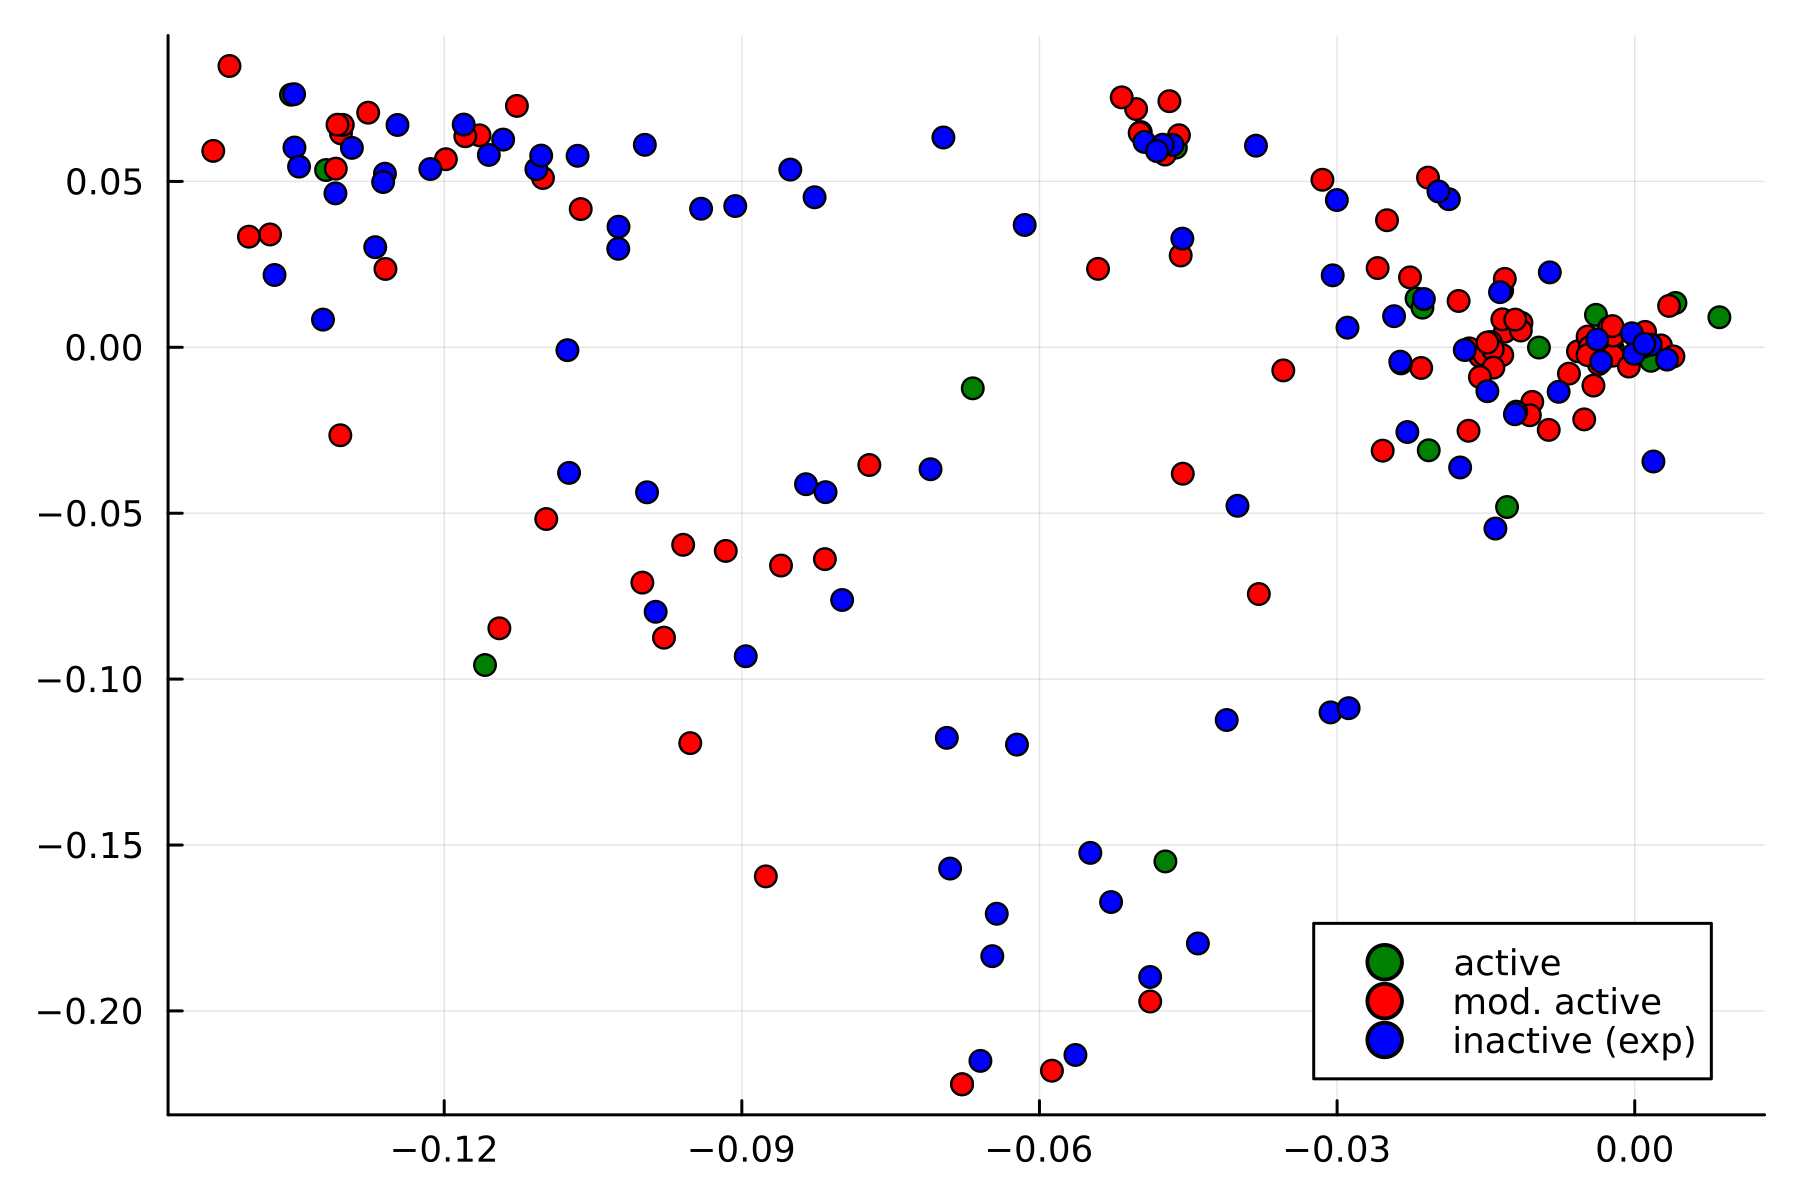

In [32]:
using Plots
function plotter()
    colors = [:green, :red, :blue]
    labels = ["active", "mod. active", "inactive (exp)"]
    fig = Plots.plot()

    for i in 1:3
        scatter!(fig, (projS2[indices[i], 1], projS2[indices[i], 2]), label=labels[i], mc = colors[i], dpi = 300) 
    end
    savefig("/home/mfat/Master-Thesis/thesis/Fig/exampprot.png")
    return fig
end

plotter()

PCA cant explain these vectors well enough in 2 dimensions! (highest explaind variance 3%...)
Let's build a simple classifier and test this. We will compare a test sequence to the 4 class hdvs and assume the lowest hamming distance to be the class

In [33]:
function predict(seq)
    y = [hamming(active_hdv, seq), hamming(modactive_hdv, seq), hamming(notactive_exp_hdv, seq), hamming(notactive_virt_hdv, seq)]
    return findmin(y)[2]
end

predict (generic function with 1 method)

Classifier seems to work okay

In [35]:
using MLDataPattern
using StatsBase
v = []
for i in 1:100
    (X_train,y_train), (X_test,y_test) = stratifiedobs((data.hdv, data.class_num), p = 0.8)
    
    active_hdv_t = bitadd(hcat([X_train[i] for i in 1:length(y_train) if y_train[i] == 1])...)
    modactive_hdv_t = bitadd(hcat([X_train[i] for i in 1:length(y_train) if y_train[i] == 2])...)
    notactive_exp_hdv_t = bitadd(hcat([X_train[i] for i in 1:length(y_train) if y_train[i] == 3])...)
    notactive_virt_hdv_t = bitadd(hcat([X_train[i] for i in 1:length(y_train) if y_train[i] == 4])...)

    pred = [predict(i) for i in X_test]
    push!(v, mean(y_test .== pred))
end

mean(v)


0.8456315789473685